In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy.diffgeom import Manifold, Patch, CoordSystem, metric_to_Christoffel_2nd
from sympy.diffgeom import TensorProduct as TP
from scipy.integrate import solve_ivp

# 1. Embedding Diagram

Setting $b\to0$,
$$
z=2\sqrt{2M(r-2M)} \quad;\quad \rho=r \quad;\quad \psi=\phi
$$
$$
\implies \rho(z)=\frac{z^2}{8M}+2M
$$

In [2]:
def ρ(z, M=1):
    return (z**2)/(8*M) + 2*M

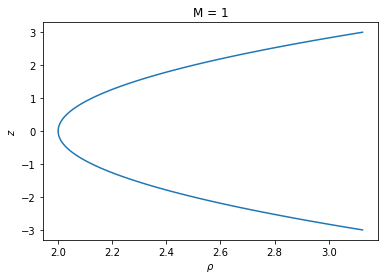

In [3]:
M = 1

ngrid = 100
zs = np.linspace(-3, 3, ngrid)
ρs = ρ(zs, M)

plt.plot(ρs, zs)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$z$')
plt.title('M = '+str(M));

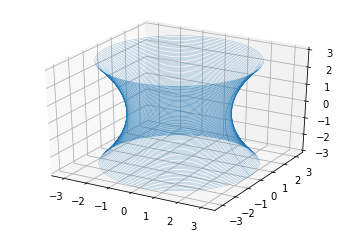

In [4]:
ϕs, zs = np.meshgrid(np.linspace(0, 2*np.pi, ngrid), np.linspace(-3, 3, ngrid))
ρs = ρ(zs, M=1)

xs = (ρs*np.cos(ϕs)).flatten()
ys = (ρs*np.sin(ϕs)).flatten()
zs = zs.flatten()

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, linewidth=0.2);

# 2. Effective Potential

## Massive

$$
V_\text{eff}(r)=-\frac{M}{\sqrt{r^2+b^2}}+\frac{l^2}{2(r^2+b^2)}-\frac{Ml^2}{(r^2+b^2)^\frac{3}{2}}
$$

$$
\frac{\partial V_\text{eff}}{\partial r}=r\left[\frac{M}{(r^2+b^2)^\frac{3}{2}}-\frac{l^2}{(r^2+b^2)^2}+\frac{3Ml^2}{(r^2+b^2)^\frac{5}{2}}\right]
$$

$$
\frac{\partial V_\text{eff}}{\partial r}=0
\implies r=0\quad\text{or}\quad\pm\infty\quad\text{or}\quad\pm\sqrt{\frac{l^4}{2M^2}-3l^2-b^2\pm\frac{l^3}{2M^2}\sqrt{l^2-12M^2}}
$$

In [5]:
def Veff(r, b, M, l):
    rb = r**2 + b**2
    return -M/np.sqrt(rb) + l**2/(2*rb) - M*l**2/rb**1.5
def rminV(b, M, l):
    if l**2>12*M**2:
        rsq = l**4/(2*M**2) - 3*l**2 - b**2 + l**3*np.sqrt(l**2-12*M**2)/(2*M**2)
        if rsq>0:
            return np.sqrt(rsq)
    print('No non-trivial minima.')
def rmaxV(b, M, l):
    if l**2>12*M**2:
        rsq = l**4/(2*M**2) - 3*l**2 - b**2 - l**3*np.sqrt(l**2-12*M**2)/(2*M**2)
        if rsq>0:
            return np.sqrt(rsq)
    print('No non-trivial maxima.')

In [6]:
b=1
M=1
l=5
ngrid = 100
rs = np.linspace(0, 10, ngrid)
Vs = Veff(rs, b, M, l)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


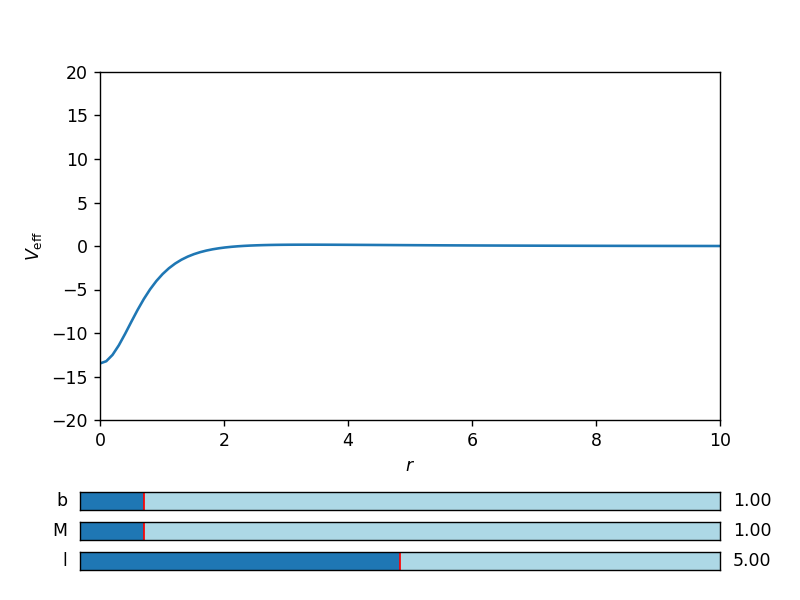

In [8]:
fig = plt.subplots()
plt.subplots_adjust(bottom=0.3)
V, = plt.plot(rs, Vs)
plt.margins(x=0)
plt.ylim(-20, 20)
plt.xlabel(r'$r$')
plt.ylabel(r'$V_\mathrm{eff}$')
axcolor = 'lightblue'
axb = plt.axes([0.1, 0.15, 0.8, 0.03], facecolor=axcolor)
axM = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor=axcolor)
axl = plt.axes([0.1, 0.05, 0.8, 0.03], facecolor=axcolor)
sb = Slider(axb, 'b', 0, 10.0, valinit=1)
sM = Slider(axM, 'M', 0, 10.0, valinit=1)
sl = Slider(axl, 'l', 0, 10.0, valinit=5)
def update(val):
    b = sb.val
    M = sM.val
    l = sl.val
    V.set_ydata(Veff(rs, b, M, l))
    fig.canvas.draw_idle()
sb.on_changed(update)
sM.on_changed(update)
sl.on_changed(update)
plt.show()

## Massless

$$
W_\text{eff}(r)=\frac{1}{r^2+b^2}\left(1-\frac{2M}{\sqrt{r^2+b^2}}\right)
$$

$$
\frac{\partial W_\text{eff}}{\partial r}=r\left[\frac{2M}{(r^2+b^2)^\frac{5}{2}}-\frac{2}{(r^2+b^2)^2}\left(1-\frac{2M}{\sqrt{r^2+b^2}}\right)\right]
$$

$$
\frac{\partial W_\text{eff}}{\partial r}=0
\implies r=0\quad\text{or}\quad\pm\infty\quad\text{or}\quad\pm\sqrt{9M^2-b^2}
$$

There are no non-trivial minima.

In [9]:
def Weff(r, b, M):
    rb = r**2 + b**2
    return (1-2*M/np.sqrt(rb))/rb
def rmaxW(b, M):
    if 9*M**2>b**2:
        return np.sqrt(9*M**2-b**2)
    print('No non-trivial maxima.')

In [10]:
b=1
M=1
ngrid = 100
rs = np.linspace(0, 10, ngrid)
Ws = Weff(rs, b, M)

<IPython.core.display.Javascript object>


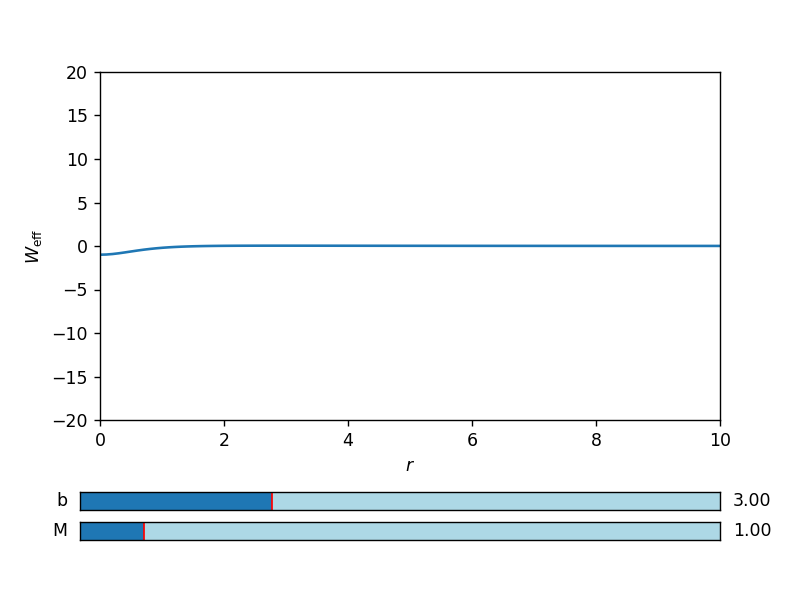

In [12]:
fig = plt.subplots()
plt.subplots_adjust(bottom=0.3)
W, = plt.plot(rs, Ws)
plt.margins(x=0)
plt.ylim(-20, 20)
plt.xlabel(r'$r$')
plt.ylabel(r'$W_\mathrm{eff}$')
axcolor = 'lightblue'
axb = plt.axes([0.1, 0.15, 0.8, 0.03], facecolor=axcolor)
axM = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor=axcolor)
sb = Slider(axb, 'b', 0, 10.0, valinit=3)
sM = Slider(axM, 'M', 0, 10.0, valinit=1)
def update(val):
    b = sb.val
    M = sM.val
    W.set_ydata(Weff(rs, b, M))
    fig.canvas.draw_idle()
sb.on_changed(update)
sM.on_changed(update)
plt.show()

# 3. Trajectories

First, we define the metric.

In [13]:
manifold = Manifold('M', 4)
patch = Patch('P', manifold)
M = sp.symbols('M')
b = sp.symbols('b')
sph_coords = CoordSystem('spherical', patch, ['t', 'r', 'theta', 'phi'])
t, r, θ, ϕ = sph_coords.coord_functions()
dt, dr, dθ, dϕ = sph_coords.base_oneforms()
dt2 = TP(dt, dt)
dr2 = TP(dr, dr)
dθ2 = TP(dθ, dθ)
dϕ2 = TP(dϕ, dϕ)

ds2 = -(1-2*M/sp.sqrt(r**2+b**2))*dt2 + (1/(1-2*M/sp.sqrt(r**2+b**2)))*dr2 + (r**2+b**2)*(dθ2 + sp.sin(θ)**2*dϕ2)
ds2

(r**2 + b**2)*(sin(theta)**2*TensorProduct(dphi, dphi) + TensorProduct(dtheta, dtheta)) + (2*M/sqrt(r**2 + b**2) - 1)*TensorProduct(dt, dt) + TensorProduct(dr, dr)/(-2*M/sqrt(r**2 + b**2) + 1)

And then, we compute the Christoffel symbols.

In [14]:
Γ = metric_to_Christoffel_2nd(ds2)
Γ

[[[0, -r*M/((r**2 + b**2)**(3/2)*(2*M/sqrt(r**2 + b**2) - 1)), 0, 0], [-r*M/((r**2 + b**2)**(3/2)*(2*M/sqrt(r**2 + b**2) - 1)), 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[r*M*(-2*M/sqrt(r**2 + b**2) + 1)/(r**2 + b**2)**(3/2), 0, 0, 0], [0, -r*M/((r**2 + b**2)**(3/2)*(-2*M/sqrt(r**2 + b**2) + 1)), 0, 0], [0, 0, -r*(-2*M/sqrt(r**2 + b**2) + 1), 0], [0, 0, 0, -r*(-2*M/sqrt(r**2 + b**2) + 1)*sin(theta)**2]], [[0, 0, 0, 0], [0, 0, r/(r**2 + b**2), 0], [0, r/(r**2 + b**2), 0, 0], [0, 0, 0, (-r**2*sin(theta)*cos(theta) - b**2*sin(theta)*cos(theta))/(r**2 + b**2)]], [[0, 0, 0, 0], [0, 0, 0, r*sin(theta)**2/(r**2*sin(theta)**2 + b**2*sin(theta)**2)], [0, 0, 0, (r**2*sin(theta)*cos(theta) + b**2*sin(theta)*cos(theta))/(r**2*sin(theta)**2 + b**2*sin(theta)**2)], [0, r*sin(theta)**2/(r**2*sin(theta)**2 + b**2*sin(theta)**2), (r**2*sin(theta)*cos(theta) + b**2*sin(theta)*cos(theta))/(r**2*sin(theta)**2 + b**2*sin(theta)**2), 0]]]

## $b=1, M=1, l=5$

We define a function $F$ which intakes proper time $\tau$, position $\mathbf{x}$, and velocity $\mathbf{u}$, and outputs the change in position $d\mathbf{x}$ and velocity $d\mathbf{u}$, using the geodesic equation.

In [15]:
def F1(t, y):
    x = y[0:4]
    u = y[4:8]
    dx = u
    du = [0, 0, 0, 0]
    for i in range(4):
        for j in range(4):
            for k in range(4):
                du[i] -= Γ.subs({M:1, b:1, θ:sp.pi/2, r:x[1]})[i,j,k] * u[j] * u[k]
    return np.concatenate((dx, du))

### Massive

In [16]:
rminV(b=1, M=1, l=5)

21.490624809821128

In [17]:
rmaxV(b=1, M=1, l=5)

3.339617535512216

Although not easily discernible in the $V_\text{eff}$ plot, the effective potential has a minima at $r\approx21.49$. Hence, bound orbital solutions exist. A massive object can have a stable circular orbit at $r\approx21.49$ or an unstable one at $r\approx3.34$.

$$
l=5\implies
u^\phi=\frac{d\phi}{d\tau}=\frac{l}{r_\text{min}^2+b^2}\approx0.011
$$

Based on $\mathbf{u}\cdot\mathbf{u}=-1$, we set the initial values:
$$
\mathbf{x}=\left(0,R,\frac{\pi}{2},0\right)
\quad\text{and}\quad
\mathbf{u}=\left(\sqrt{\frac{1+U^2(R^2+b^2)}{1-\frac{2M}{\sqrt{R^2+b^2}}}},0,0,U\right)
$$

In [18]:
R = 21.49
U = 0.011
T = np.linspace(0, 1000, 1000)
rb0 = R**2 + 1
f0 = 1-2/np.sqrt(rb0)
x0 = [0, R, np.pi/2, 0]
u0 = [np.sqrt((1+U**2*rb0)/f0), 0, 0, U]
sol = solve_ivp(F1, [T[0], T[-1]], x0+u0, t_eval=T)

In [19]:
%matplotlib inline

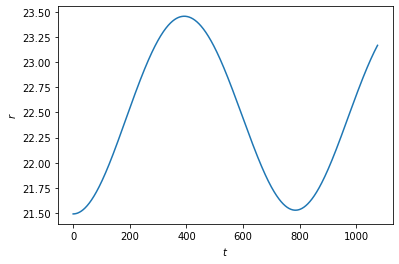

In [20]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

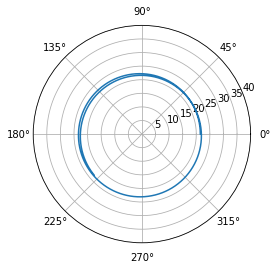

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.grid(True)

### Massless

In [22]:
rmaxW(b=1, M=1)

2.8284271247461903

A massless object can have an unstable circular orbit at $r\approx2.83$.

Based on $\mathbf{u}\cdot\mathbf{u}=0$, we set the initial values:
$$
\mathbf{x}=\left(0,R,\frac{\pi}{2},0\right)
\quad\text{and}\quad
\mathbf{u}=\left(\sqrt{\frac{(R^2+b^2)}{1-\frac{2M}{\sqrt{R^2+b^2}}}}U,0,0,U\right)
$$

In [23]:
R = 2.83
U = 0.1
T = np.linspace(0, 100, 100)
rb0 = R**2 + 1
f0 = 1-2/np.sqrt(rb0)
x0 = [0, R, np.pi/2, 0]
u0 = [np.sqrt(rb0/f0)*U, 0, 0, U]
sol = solve_ivp(F1, [T[0], T[-1]], x0+u0, t_eval=T)

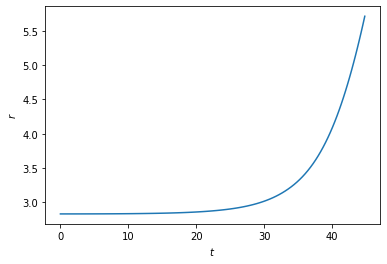

In [24]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

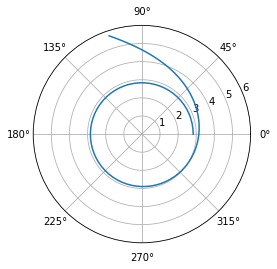

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.grid(True)

## $b=3, M=1, e=-.05, l=2$

In [26]:
def F2(t, y):
    x = y[0:4]
    u = y[4:8]
    dx = u
    du = [0, 0, 0, 0]
    for i in range(4):
        for j in range(4):
            for k in range(4):
                du[i] -= Γ.subs({M:1, b:3, θ:sp.pi/2, r:x[1]})[i,j,k] * u[j] * u[k]
    return np.concatenate((dx, du))

### Massive

In [27]:
rminV(b=3, M=1, l=2)

No non-trivial minima.


$$
l=2\implies
u^\phi=\frac{d\phi}{d\tau}=\frac{l}{r^2+b^2}=\frac{2}{r^2+9}
$$

$$
e=-0.05\implies
u^t=\frac{dt}{d\tau}=\frac{e}{1-\frac{2M}{\sqrt{r^2+b^2}}}=\frac{\sqrt{r^2+9}}{20\sqrt{r^2+9}-40}
$$

Based on $\mathbf{u}\cdot\mathbf{u}=-1$, we set the initial values:
$$
\mathbf{x}=\left(0,R,\frac{\pi}{2},0\right)
\quad\text{and}\quad
\mathbf{u}=\left(\frac{\sqrt{R^2+9}}{40-20\sqrt{R^2+9}},u_r,0,\frac{2}{R^2+9}\right)
$$
where $g_{rr}u_r^2=-g_{tt}u_t^2-g_{\phi\phi}u_\phi^2-1$.

In [28]:
R = 10
T = np.linspace(0, 50, 100)
Ut = np.sqrt(R**2+9)/(20*np.sqrt(R**2+9)-40)
Uf = 2/R**2
Ur = -np.sqrt(np.abs((2/np.sqrt(R**2+9)-1)*((2/np.sqrt(R**2+9)-1)*Ut**2+(R**2+9)*Uf**2+1)))
x0 = [0, R, np.pi/2, 0]
u0 = [Ut, Ur, 0, Uf]
sol = solve_ivp(F2, [T[0], T[-1]], x0+u0, t_eval=T)

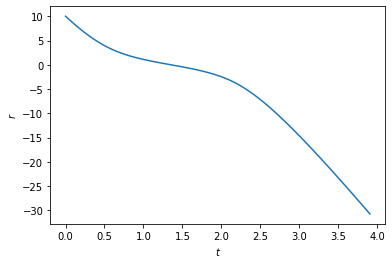

In [29]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

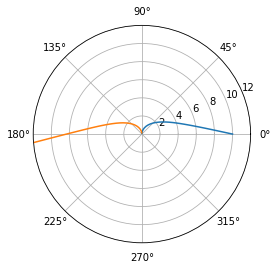

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.plot(sol.y[3], -sol.y[1])
ax.set_ylim(0, 12)
ax.grid(True)

The blue trajectory is in the $r>0$ subspace, and the orange trajectory is in the $r<0$ subspace.

### Massless

In [31]:
rmaxW(b=3, M=1)

No non-trivial maxima.


Based on $\mathbf{u}\cdot\mathbf{u}=0$, we set the initial values:
$$
\mathbf{x}=\left(0,R,\frac{\pi}{2},0\right)
\quad\text{and}\quad
\mathbf{u}=\left(\frac{\sqrt{R^2+9}}{40-20\sqrt{R^2+9}},u^r,0,\frac{2}{R^2+9}\right)
$$
where $g_{rr}u_r^2=-g_{tt}u_t^2-g_{\phi\phi}u_\phi^2$.

In [32]:
R = 10
T = np.linspace(0, 100, 100)
Ut = np.sqrt(R**2+9)/(20*np.sqrt(R**2+9)-40)
Uf = 2/R**2
Ur = -np.sqrt(np.abs((2/np.sqrt(R**2+9)-1)*((2/np.sqrt(R**2+9)-1)*Ut**2+(R**2+9)*Uf**2)))
x0 = [0, R, np.pi/2, 0]
u0 = [Ut, Ur, 0, Uf]
sol = solve_ivp(F2, [T[0], T[-1]], x0+u0, t_eval=T)

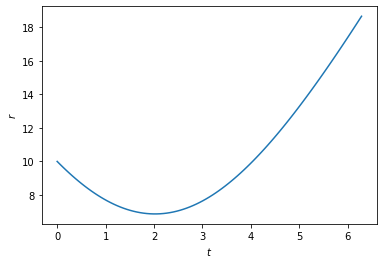

In [33]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

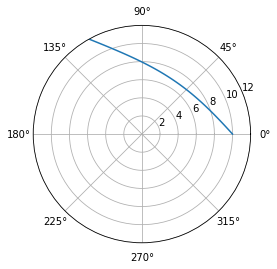

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.set_ylim(0, 12)
ax.grid(True)

## $M=0$

$$
V_\text{eff}(r)=\frac{l^2}{2(r^2+b^2)}
$$

$$
\frac{\partial V_\text{eff}}{\partial r}=-\frac{l^2r}{(r^2+b^2)^2}
$$

$$
\frac{\partial V_\text{eff}}{\partial r}=0
\implies r=0\quad\text{or}\quad\pm\infty
$$

Since the effective potential has no non-trivial extrema, bound orbital solutions do not exist for a massive object.

$$
W_\text{eff}(r)=\frac{1}{r^2+b^2}
$$

$$
\frac{\partial W_\text{eff}}{\partial r}=-\frac{2r}{(r^2+b^2)^2}
$$

$$
\frac{\partial W_\text{eff}}{\partial r}=0
\implies r=0\quad\text{or}\quad\pm\infty
$$

Since the effective potential has no non-trivial maxima, unstable orbital solutions do not exist for a massless object either.

## Miscellaneous

Since the effective potential has a minimum at $r=0$ for a wide range of parameters, it's only natural to assume that there are bound orbits that oscillate between the two subspaces.

In [81]:
R = 1
T = np.linspace(0, 500, 1000)
Uf = 0.1
x0 = [0, R, np.pi/2, 0]
u0 = [1, 0, 0, Uf]
sol = solve_ivp(F2, [T[0], T[-1]], x0+u0, t_eval=T)

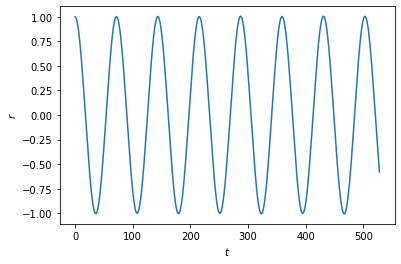

In [82]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

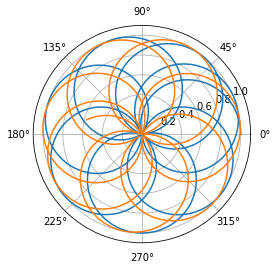

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.plot(sol.y[3], -sol.y[1])
ax.grid(True)

Rad.

In [127]:
R = 1
T = np.linspace(0, 250, 1000)
Uf = 0.176
x0 = [0, R, np.pi/2, 0]
u0 = [1, 0, 0, Uf]
sol = solve_ivp(F2, [T[0], T[-1]], x0+u0, t_eval=T)

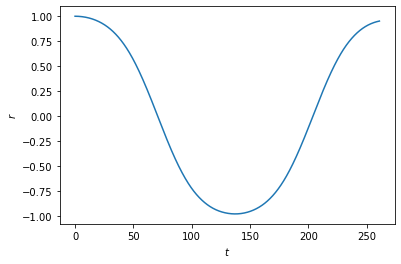

In [128]:
plt.plot(sol.y[0], sol.y[1])
plt.xlabel(r'$t$')
plt.ylabel(r'$r$');

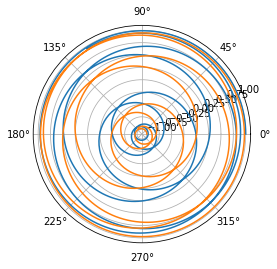

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(sol.y[3], sol.y[1])
ax.plot(sol.y[3], -sol.y[1])
ax.grid(True)

Nice.